# Introducción a las librerías NumPy, SciPy y Pandas

## Tabla de contenidos
* [NumPy](#NumPy)
* [SciPy](#SciPy)
* [Pandas](#Pandas)
    * [Series](#Series)
    * [DataFrame](#DataFrame)

## NumPy

La librería `NumPy` incorpora objetos llamados arreglos (array), los cuales son estructuras de datos de un mismo tipo organizados en forma de tabla o cuadrícula de distintas dimensiones. Para trabajar con esta libería, es necesario mandarla llamar.

In [ ]:
import numpy as np


Comenzamos creando un arreglo de una dimension.

In [ ]:
a = np.array([1,2,3,4,5,6]) # Crea un arreglo con los enteros del 1 al 6
print(a) # Imprime los valores guardados en la variable a

[1 2 3 4 5 6]


Podemos acceder a los elementos individuales del arreglo.

In [ ]:
a[0] # Regresa el primer elemento del arreglo

1

In [ ]:
a[1:5] # Regresa los elementos en las posiciones o y hasta la 4. El elemento del límite superior es omitido.

array([2, 3, 4, 5])

Los arreglos son objetos, por lo que tienen varios **atributos** y  **métodos** asociados.

In [ ]:
a.shape # Regresa las dimensiones del arreglo


(6,)

In [ ]:
a.mean() # Regresa el promedio del arreglo

3.5

In [ ]:
a.sum() # regresa la suma de los elementos del arreglo

21

In [ ]:
a.max() # regresa el máximo de los elementos del arreglo

6

Podemos crear arreglos en dos dimensiones.

In [ ]:
A = np.array([[1,2,3], [4,5,6]])
print(A)

[[1 2 3]
 [4 5 6]]


Los arreglos de dos dimensiones tienen sus propios métodos.

In [ ]:
A.shape # Regresa las dimensiones del arreglo

(2, 3)

In [ ]:
A.sum() # suma todos los elementos del arreglo

21

In [ ]:
A.sum(axis=0) # suma los renglones del arreglo

array([5, 7, 9])

In [ ]:
A.sum(axis=1) # suma las columnas del arreglo

array([ 6, 15])

Por último, veremos como crear arreglos de 3 dimensiones. En principio, no existe un límite para el número de dimensiones del arreglo, siempre y cuando haya suficiente memoria para crear estos arreglos.

In [ ]:
B = np.array([[[1,2,3],    [4,5,6]],
              [[7,8,9],    [10,11,12]],
              [[13,14,15], [16,17,18]]])
print(B)

[[[ 1  2  3]
  [ 4  5  6]]

 [[ 7  8  9]
  [10 11 12]]

 [[13 14 15]
  [16 17 18]]]


In [ ]:
B.shape

(3, 2, 3)

In [ ]:
B.ndim

3

In [ ]:
B.size

18

In [ ]:
B.dtype

dtype('int64')

In [ ]:
B.mean()

9.5

In [ ]:
B.mean(axis=0)

array([[ 7.,  8.,  9.],
       [10., 11., 12.]])

# SciPy
La librería `SciPy` tiene distintas rutinas matemáticas que trabajan en conjunto con los arreglos de `NumPy`. Comenzamos mostrando el uso de las rutinas para generar numeros aleatorios.

In [ ]:
from scipy.stats import norm
x = np.linspace(0, 5, num=5)
y = norm.rvs(size=5)
print(x)
print(y)

[0.   1.25 2.5  3.75 5.  ]
[ 1.86267788 -0.91376424  1.38121312  0.77676187 -1.07182516]


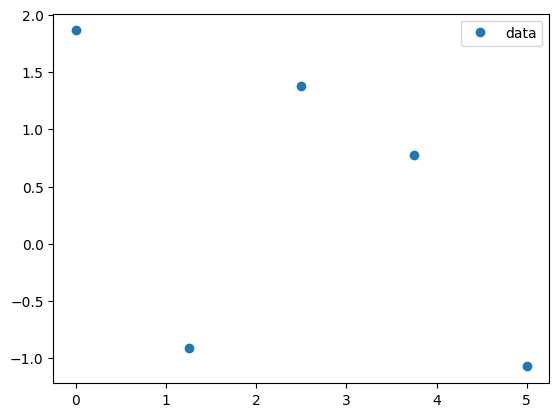

In [ ]:
import matplotlib.pyplot as plt
plt.plot(x, y, 'o', label='data')
plt.legend(loc='best')
plt.show()

Ahora creamos una interpolación suave de estos datos.

In [ ]:
from scipy.interpolate import CubicSpline
spline = CubicSpline(x, y)
spline(2)

array(0.51880437)

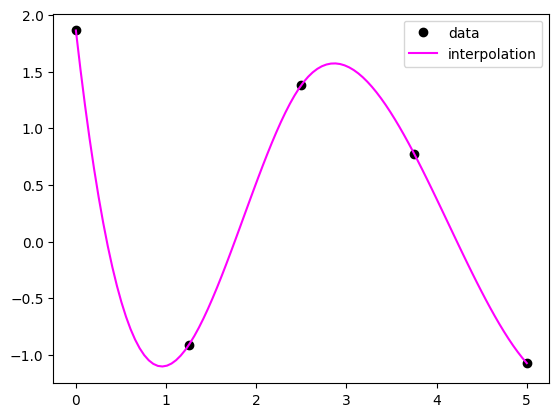

In [ ]:
newx = np.linspace(0, 5, 100)
newy = spline(newx)
plt.plot(x, y, 'o', color="black", label='data')
plt.plot(newx, newy, "-", color="magenta", label = "interpolation")
plt.legend(loc='best')
plt.show()

## Pandas

`Pandas` es una librería que permite crear y manipular estructuras de datos. Esta libería permite crear objetos basados en los arreglos de `Numpy` pero con funcionalidades adicionales. Los tipos de estructuras que se pueden crear son:

- Series: Estructura de una dimensión.
- DataFrame: Estructura de dos dimensiones (tablas).
- Panel: Estructura de tres dimensiones (cubos).

### Series

Comenzamos cargando la librería y creando una Serie.

In [ ]:
import pandas as pd
clases = pd.Series(['Matemáticas', 'Historia', 'Economía', 'Programación', 'Inglés'])
scores = pd.Series([9, 6, 9, 10, 7], index = clases)
print(scores)

Matemáticas      9
Historia         6
Economía         9
Programación    10
Inglés           7
dtype: int64


#### Atributos del objeto Series
Las series tienen varios atributos:

In [ ]:
scores.index

Index(['Matemáticas', 'Historia', 'Economía', 'Programación', 'Inglés'], dtype='object')

In [ ]:
scores.size

5

In [ ]:
scores.dtype

dtype('int64')

#### Acceder a los elementos de una serie
Se puede acceder a los elementos de la serie de distitnas formas.La primera es haciendo referencia a la posición que ocupa el elemento en la serie.

In [ ]:
scores[0]

9

In [ ]:
scores[1:4]

Historia         6
Economía         9
Programación    10
dtype: int64

Otra forma es indicando el nombre del índice.

In [ ]:
scores["Matemáticas"]

9

In [ ]:
scores[["Historia", "Economía"]]

Historia    6
Economía    9
dtype: int64

#### Métodos de una serie
Las series tienen varios métodos asociados que permiten obtener varios resumenes de forma rápida.

In [ ]:
scores.count() # Número de elementos no nulos

5

In [ ]:
scores.sum() # Regresa la suma de los elementos de la serie

41

In [ ]:
clases.sum() # Con series de caracteres, este comando concatena los valores en una sola cadena de texto

'MatemáticasHistoriaEconomíaProgramaciónInglés'

In [ ]:
scores.mean() # Regresa el promedio de los elementos de la serie

8.2

In [ ]:
scores.value_counts() # Devuelve una serie con las frecuencias de los valores de la serie

9     2
6     1
10    1
7     1
dtype: int64

In [ ]:
scores.min() # Regresa el mínimo de la serie

6

In [ ]:
scores.max() # Regresa el máximo de la serie

10

In [ ]:
scores.var() # Regresa la varianza muestral de la serie

2.7

In [ ]:
scores.std() # Regresa la desviación estándar de la serie

1.6431676725154984

In [ ]:
scores.describe() # Regresa una serie con estadísticas descriptivas

count     5.000000
mean      8.200000
std       1.643168
min       6.000000
25%       7.000000
50%       9.000000
75%       9.000000
max      10.000000
dtype: float64

In [ ]:
ventas = pd.Series([10, 3, 5, 6, 7, 2, 10],
                   index = ["Lunes", "Martes", "Miercoles", "Jueves", "Viernes", "Sábado", "Domingo"])
ventas.cumsum()

Lunes        10
Martes       13
Miercoles    18
Jueves       24
Viernes      31
Sábado       33
Domingo      43
dtype: int64

#### Operaciones con series
Se pueden hacer operaciones básicas con las series, por ejemplo +,-,*,/, etc. La operación se realiza para cada elemento y se obtiene una nueva serie.

In [ ]:
scores * 10

Matemáticas      90
Historia         60
Economía         90
Programación    100
Inglés           70
dtype: int64

In [ ]:
clases * 2

0      MatemáticasMatemáticas
1            HistoriaHistoria
2            EconomíaEconomía
3    ProgramaciónProgramación
4                InglésInglés
dtype: object

#### Aplicar funciones a series
Hay varias formas de aplicar funciones sobre una serie.

In [ ]:
np.log(scores)

Matemáticas     2.197225
Historia        1.791759
Economía        2.197225
Programación    2.302585
Inglés          1.945910
dtype: float64

In [ ]:
scores.apply(np.log)

Matemáticas     2.197225
Historia        1.791759
Economía        2.197225
Programación    2.302585
Inglés          1.945910
dtype: float64

In [ ]:
#str.lower(clases)

In [ ]:
clases.apply(str.lower)

0     matemáticas
1        historia
2        economía
3    programación
4          inglés
dtype: object

#### Filtrar una serie
Se puede filtrar una serie pasando valores lógicos como índices, los cuales se obtienen de comparasiones.

In [ ]:
print(scores > 9)
scores[scores > 9]

Matemáticas     False
Historia        False
Economía        False
Programación     True
Inglés          False
dtype: bool


Programación    10
dtype: int64

In [ ]:
#scores[scores > 6 and scores <9]

#### Ordenar series
Es posible ordenar series ya sea en términos de sus valores o en términos de sus índices

In [ ]:
scores.sort_values(ascending = True)

In [ ]:
scores.sort_index(ascending=True)

In [ ]:
scores

#### Datos faltantes de una serie

Cuando existen datos faltantes, Python los identifica con `NaN`, `None` o `NaT`. Es posible eiminar estos datos o rellenar los espacios, esto dependerá de las características de los datos y el tipo de análisis que se hará con ellos.

In [ ]:
ingreso = pd.Series([10000,15000,17000,np.NaN, 8000, 20000])
print(ingreso)

In [ ]:
ingreso.interpolate() # Rellena los datos faltantes usando el punto medio de las entradas adyacentes

In [ ]:
clientes = pd.Series(["Ale", "Pedro", "Daniel", "Mariana", "Monica", None])
print(clientes)

In [ ]:
clientes.dropna()

### DataFrame

Un DataFrame es una tabla donde cada columna es un objeto de la clase Series. Los DataFrame se usan para representar datos estructurados de forma similar a como se hace en una hoja de Excel. Hay diversas formas de crear un DataFrame:

- a partir de un diccionario de listas
- a partir de un arreglo de numpy
- a partir de un archivo csv o Excel
- a partir de una lista de listas
- a partir de una lista de diccionarios

Veamos ejemplos de los primeros tres casos.


In [ ]:
# Creando un DataFrame a partir de un diccionario de listas
raw = {"Nombre" : ["Ana", "Luis", "Eli", "Marco"],
       "Matrícula": [10234, 45336, 12378, 87543],
       "Matemáticas" : [10, 9, 10, 10],
       "Estadística" : [8, 9, 7, 10],
       "Historia": [10, 9, 9, 9]}
print(raw)


In [ ]:
Scores = pd.DataFrame(raw)
print(Scores)

In [ ]:
# Creando un DataFrame a partir de un arreglo de numpy
R = pd.DataFrame(np.random.randn(5,4).round(1),
                 columns = ["X1", "X2", "X3", "X4"],
                 index=["obs1", "obs2", "obs3", "obs4", "obs5"])
print(R)

In [ ]:
# Creando un DataFrame a partir de un archivo
P = pd.read_csv("Peliculas.csv", header=0, index_col = 0, sep=",")
P

#### Atributos de un DataFrame
Al igual que una Serie, un DataFrame tiene varios atributos que nos dan información sobre el objeto.

In [ ]:
P.info()

In [ ]:
P.shape

In [ ]:
P.size

In [ ]:
P.columns

In [ ]:
P.index

In [ ]:
P.dtypes

In [ ]:
P.head(2)

In [ ]:
P.tail(2)

#### Estadísticas descriptivas

Es posible obtener información descriptiva de los datos gaurdados en un DataFrame a través de los siguientes métodos.

In [ ]:
P.count()

In [ ]:
P.sum()

In [ ]:
P.cumsum()

In [ ]:
P.min()

In [ ]:
P.max()

In [ ]:
P.mean()

In [ ]:
P.var()

In [ ]:
P.std()

In [ ]:
P.cov()

In [ ]:
P.corr()

In [ ]:
P.describe()

#### Acceder a los elementos de un DataFrame

Se puede acceder a los ditintos elementos de un DataFrame especificando las posiciones el objeto o los nombres de filas o columnas. Veamos primero el caso en el que especificamos las posicinoes.

In [ ]:
Scores.iloc[0,0] # Decuelve el valor del DataFrame en la celda indicada

In [ ]:
Scores.iloc[1] # Regresa el renglón indicado en forma de serie

In [ ]:
Scores.iloc[1:3, 1:2]

Veamos ahora el caso en el que especificamos los nombres de los renglones y filas.

In [ ]:
Scores.loc[0:2, "Historia"]

In [ ]:
Scores["Matemáticas"]

In [ ]:
Scores[["Estadística", "Matemáticas"]]

In [ ]:
Scores.Matemáticas

#### Modificación de un DataFrame

Una vez que se ha creado un DataFrame, una tarea común es modficar la información que contiene. Por ejemplo, se pueden añadir o quitar observaciones (renglones), añadir o quitar variables (columnas), combinar varios DataFrame, etc.

Veamos primero el caso en el que se añaden observaciones.

In [ ]:
print(Scores)
Scores = Scores.append(pd.Series(["Iván", 33200, "6", "7", "10"],
                       index = ["Nombre", "Matrícula", "Matemáticas", "Estadística", "Historia"]),
                        ignore_index=True)
print(Scores)

Veamos ahora como eliminar filas de un DataFrame.

In [ ]:
print(Scores.drop(4))
print(Scores)

Para eliminar columnas, podemos usar el comando `del` o el método `pop` de la clase DataFrame.

In [ ]:
del Scores["Historia"] # Elimina la columna de la serie
print(Scores)

In [ ]:
Scores.pop("Matrícula") # Elimina la columna "Matricula" y regresa sus valores como una serie
print(Scores)

Hay varias formas de agregar columnas. Veamos algunas opciones.

In [ ]:
print(Scores)
Scores["Inglés"] = [9, 10, 10, 5, 6]
print(Scores)

In [ ]:
Scores.insert(2, "Español", [8,6,5,9,5], allow_duplicates=True)
print(Scores)

In [ ]:
Scores

In [ ]:
Scores.sort_values("Estadística")

In [ ]:
Scores.sort_values("Nombre")

In [ ]:
Scores.sort_index()